In [7]:
# Import pandas
import pandas as pd

# Load the CSV data into DataFrames
super_bowls =pd.read_csv('./datasets/super_bowls.csv')
tv = pd.read_csv('./datasets/tv.csv')
halftime_musicians = pd.read_csv('./datasets/halftime_musicians.csv')

# Display the first five rows of each DataFrame
display(super_bowls.head(5))
display(tv.head(5))
display(halftime_musicians.head(5))

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


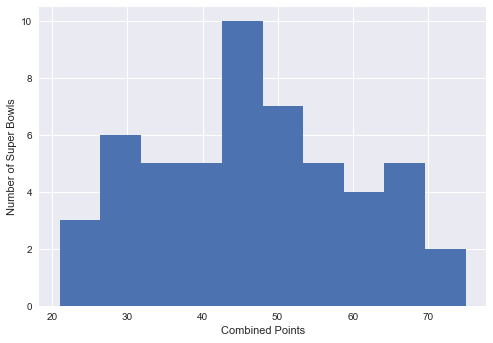

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [8]:
# Import matplotlib and set plotting style
from matplotlib import pyplot  as plt
import pandas as pd
# allows us to display graphs without plt.show()
%matplotlib inline
plt.style.use('seaborn')

# Plot a histogram of combined points
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')

plt.hist(super_bowls["combined_pts"],10)
plt.show()

# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

   object
 12  losing_pts      52 non-null     int64 
 13  qb_loser_1      52 non-null     object
 14  qb_loser_2      3 non-null      object
 15  coach_loser     52 non-null     object
 16  combined_pts    52 non-null     int64 
 17  difference_pts  52 non-null     int64 
dtypes: int64(6), object(12)
memory usage: 4.9+ KB
tv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage:

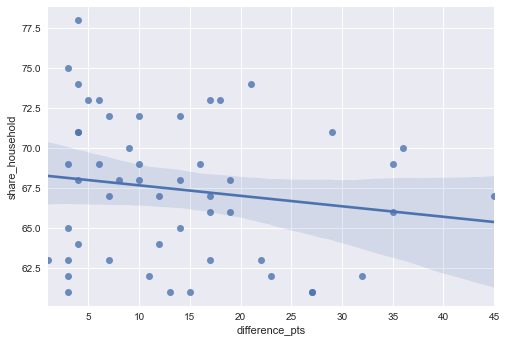

In [17]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')
print("super_bowls")
super_bowls.info()
print("tv")
tv.info()
print("games_tv")
games_tv.info()
print(games_tv)
import seaborn as sns
# Create a scatter plot with a linear regression model fit
sns.regplot(x=games_tv.difference_pts, y=games_tv.share_household,data=games_tv)


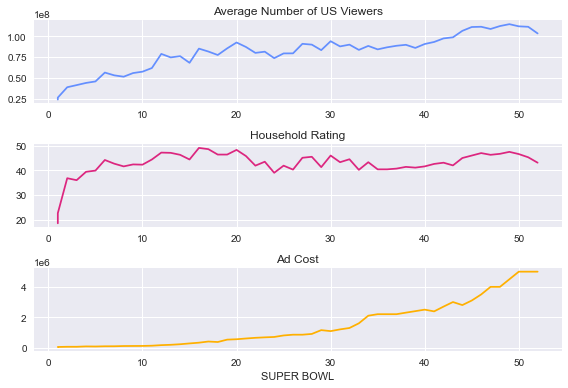

In [18]:
# Create a figure with 3x1 subplot and activate the top subplot
import matplotlib.pyplot as plt
plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl,tv.avg_us_viewers, color="#648FFF")
plt.title('Average Number of US Viewers')

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household, color="#DC267F")
plt.title('Household Rating')

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost , color="#FFB000")
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

In [34]:
# Display all halftime musicians for Super Bowls up to and including Super Bowl XXVII
#super_bowls.info()
#tv.info()
halftime_musicians = pd.read_csv('./datasets/halftime_musicians.csv')
halftime_musicians[halftime_musicians['super_bowl'] >=27]

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0
...,...,...,...
76,28,Tanya Tucker,2.0
77,28,Travis Tritt,2.0
78,28,The Judds,1.0
79,28,Wynonna Judd,2.0


In [36]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Display musicians with more than one halftime show appearance
halftime_appearances[halftime_appearances.super_bowl>1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


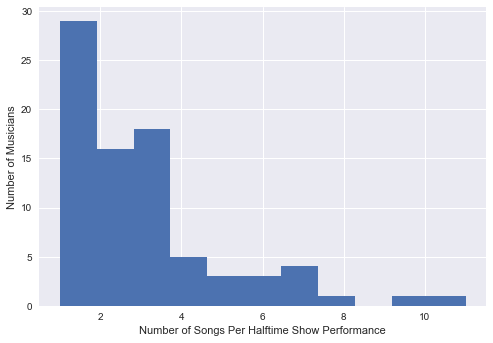

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [37]:
# Filter out most marching bands
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.ylabel('Number of Musicians')
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.show()

# Sort the non-band musicians by number of songs per appearance...
no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...and display the top 15
display(no_bands.head(15))

In [42]:
# 2018-2019 conference champions
patriots = 'New England Patriots'
rams = 'Los Angeles Rams'
# Who will win Super Bowl LIII?
super_bowl_LIII_winner = patriots
print('The winner of Super Bowl LIII will be the', super_bowl_LIII_winner)

The winner of Super Bowl LIII will be the           date  super_bowl                          venue             city  \
0   2018-02-04          52              U.S. Bank Stadium      Minneapolis   
1   2017-02-05          51                    NRG Stadium          Houston   
2   2016-02-07          50                 Levi's Stadium      Santa Clara   
3   2015-02-01          49  University of Phoenix Stadium         Glendale   
4   2014-02-02          48                MetLife Stadium  East Rutherford   
5   2013-02-03          47        Mercedes-Benz Superdome      New Orleans   
6   2012-02-05          46              Lucas Oil Stadium     Indianapolis   
7   2011-02-06          45                Cowboys Stadium        Arlington   
8   2010-02-07          44               Sun Life Stadium    Miami Gardens   
9   2009-02-01          43          Raymond James Stadium            Tampa   
10  2008-02-03          42  University of Phoenix Stadium         Glendale   
11  2007-02-04        

In [65]:
#import pandas as pd
import warnings
warnings.filterwarnings('ignore')

homelessness=pd.read_csv('./datasets/2007-2016-Homelessnewss-USA.csv')
print(homelessness.head())
print(homelessness.info())
print(homelessness.shape)
print(homelessness.describe())

Year State CoC Number       CoC Name  \
0  1/1/2007    AK     AK-500  Anchorage CoC   
1  1/1/2007    AK     AK-500  Anchorage CoC   
2  1/1/2007    AK     AK-500  Anchorage CoC   
3  1/1/2007    AK     AK-500  Anchorage CoC   
4  1/1/2007    AK     AK-500  Anchorage CoC   

                                     Measures Count  
0            Chronically Homeless Individuals   224  
1                        Homeless Individuals   696  
2                 Homeless People in Families   278  
3  Sheltered Chronically Homeless Individuals   187  
4                          Sheltered Homeless   842  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        86529 non-null  object
 1   State       86529 non-null  object
 2   CoC Number  86529 non-null  object
 3   CoC Name    86529 non-null  object
 4   Measures    86529 non-null  object
 5   Count  

In [66]:
# Import pandas using the alias pd
import pandas as pd

# Print the values of homelessness
print(homelessness.values)

# Print the column index of homelessness
print(homelessness.columns)

# Print the row index of homelessness
print(homelessness.index)

[['1/1/2007' 'AK' 'AK-500' 'Anchorage CoC'
  'Chronically Homeless Individuals' '224']
 ['1/1/2007' 'AK' 'AK-500' 'Anchorage CoC' 'Homeless Individuals' '696']
 ['1/1/2007' 'AK' 'AK-500' 'Anchorage CoC' 'Homeless People in Families'
  '278']
 ...
 ['1/1/2016' 'WY' 'WY-500' 'Wyoming Statewide CoC'
  'Unsheltered Parenting Youth (Under 25)' '3']
 ['1/1/2016' 'WY' 'WY-500' 'Wyoming Statewide CoC'
  'Unsheltered Parenting Youth Age 18-24' '3']
 ['1/1/2016' 'WY' 'WY-500' 'Wyoming Statewide CoC'
  'Unsheltered Parenting Youth Under 18' '0']]
Index(['Year', 'State', 'CoC Number', 'CoC Name', 'Measures', 'Count'], dtype='object')
RangeIndex(start=0, stop=86529, step=1)


In [72]:
# Sort homelessness by individual
print(homelessness.columns)
homelessness_meas = homelessness.sort_values("Measures",ascending=False)

# Print the top few rows
print(homelessness_ind.head())

Index(['Year', 'State', 'CoC Number', 'CoC Name', 'Measures', 'Count'], dtype='object')
           Year State CoC Number                           CoC Name  \
65403  1/1/2015    OH     OH-506  Akron/Barberton/Summit County CoC   
83589  1/1/2016    PA     PA-601           Western Pennsylvania CoC   
74055  1/1/2016    GA     GA-508    DeKalb County Continuum of Care   
57423  1/1/2015    ID     ID-500               Boise/Ada County CoC   
57381  1/1/2015    IA     IA-502         Des Moines/Polk County CoC   

                          Measures Count  
65403  Children of Parenting Youth    23  
83589  Children of Parenting Youth    30  
74055  Children of Parenting Youth    17  
57423  Children of Parenting Youth     3  
57381  Children of Parenting Youth    23  


In [79]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["Year","CoC Number"],ascending=[True,False])

# Print the top few rows
print(homelessness_reg_fam.head())

Year State CoC Number               CoC Name  \
4812  1/1/2007    WY     WY-500  Wyoming Statewide CoC   
4813  1/1/2007    WY     WY-500  Wyoming Statewide CoC   
4814  1/1/2007    WY     WY-500  Wyoming Statewide CoC   
4815  1/1/2007    WY     WY-500  Wyoming Statewide CoC   
4816  1/1/2007    WY     WY-500  Wyoming Statewide CoC   

                                        Measures Count  
4812            Chronically Homeless Individuals    38  
4813                        Homeless Individuals   331  
4814                 Homeless People in Families   206  
4815  Sheltered Chronically Homeless Individuals     0  
4816                          Sheltered Homeless   397  


In [85]:
# Filter for rows where coc_number is greater than B
coc_number_gt_b = homelessness[homelessness["CoC Number"]>"B"]

# See the result
print(coc_number_gt_b)

Year State CoC Number                                CoC Name  \
264    1/1/2007    CA     CA-500  San Jose/Santa Clara City & County CoC   
265    1/1/2007    CA     CA-500  San Jose/Santa Clara City & County CoC   
266    1/1/2007    CA     CA-500  San Jose/Santa Clara City & County CoC   
267    1/1/2007    CA     CA-500  San Jose/Santa Clara City & County CoC   
268    1/1/2007    CA     CA-500  San Jose/Santa Clara City & County CoC   
...         ...   ...        ...                                     ...   
86524  1/1/2016    WY     WY-500                   Wyoming Statewide CoC   
86525  1/1/2016    WY     WY-500                   Wyoming Statewide CoC   
86526  1/1/2016    WY     WY-500                   Wyoming Statewide CoC   
86527  1/1/2016    WY     WY-500                   Wyoming Statewide CoC   
86528  1/1/2016    WY     WY-500                   Wyoming Statewide CoC   

                                                Measures  Count  
264                     Chronica

In [91]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
measures=["Homeless Individuals","Sheltered Homeless"]
some_measures =homelessness[homelessness["Measures"].isin(measures)]

# See the result
print(some_measures)

Year State CoC Number  \
1      1/1/2007    AK     AK-500   
4      1/1/2007    AK     AK-500   
13     1/1/2007    AK     AK-501   
16     1/1/2007    AK     AK-501   
25     1/1/2007    AL     AL-500   
...         ...   ...        ...   
86420  1/1/2016    WV     WV-503   
86449  1/1/2016    WV     WV-508   
86462  1/1/2016    WV     WV-508   
86491  1/1/2016    WY     WY-500   
86504  1/1/2016    WY     WY-500   

                                                CoC Name  \
1                                          Anchorage CoC   
4                                          Anchorage CoC   
13                           Alaska Balance of State CoC   
16                           Alaska Balance of State CoC   
25     Birmingham/Jefferson, St. Clair, Shelby Counti...   
...                                                  ...   
86420  Charleston/Kanawha, Putnam, Boone, Clay Counti...   
86449                 West Virginia Balance of State CoC   
86462                 West Virginia Ba

In [123]:
# Create indiv_per_10k col as homeless individuals per 10k state pop

#homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"] 

# Subset rows for indiv_per_10k greater than 20
#high_homelessness = homelessness[homelessness["indiv_per_10k"]>20]

# Sort high_homelessness by descending indiv_per_10k
#high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k",ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
#result = high_homelessness_srt[["state","indiv_per_10k"]]

# See the result
#print(result)